# Classifying Websites into Phishing Websites and Not Phishing Websites using ML

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [2]:
#reading the data
df=pd.read_excel('Phishing Data.xlsx')
df

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1.0,1.0,0.0,0.0,1.0,-1.0,-1.0,-1.0,0.0,0.0,...,0.0,0.0,-1.0,1.0,-1.0,-1.0,0.0,1.0,1.0,1.0
1,0.0,1.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,-1.0,1.0,0.0,-1.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,-1.0,0.0,0.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,1.0,0.0,...,0.0,0.0,-1.0,1.0,1.0,-1.0,0.0,-1.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,-1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,-1.0,1.0,0.0,-1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,...,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2452,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,1.0,0.0,1.0
2453,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2454,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,-1.0,-1.0,0.0,0.0,0.0,1.0


In [3]:
#checking for null values
df.isna().any()

having_IP_Address              False
URL_Length                     False
Shortining_Service             False
having_At_Symbol               False
double_slash_redirecting       False
Prefix_Suffix                  False
having_Sub_Domain              False
SSLfinal_State                 False
Domain_registeration_length    False
Favicon                        False
port                           False
HTTPS_token                    False
Request_URL                    False
URL_of_Anchor                  False
Links_in_tags                  False
SFH                            False
Submitting_to_email            False
Abnormal_URL                   False
Redirect                       False
on_mouseover                   False
RightClick                     False
popUpWidnow                    False
Iframe                         False
age_of_domain                  False
DNSRecord                      False
web_traffic                    False
Page_Rank                      False
G

No Null Values!

In [4]:
df.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,...,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000
mean,0.113192,-0.649837,0.122964,0.054560,0.125407,-0.254886,-0.185668,0.255700,0.018730,0.189739,...,0.196254,0.092020,-0.003257,0.536645,0.304560,-0.540717,0.139658,0.344463,0.179153,0.445440
std,0.316892,0.752690,0.328463,0.227166,0.331247,0.676170,0.802068,0.912332,0.798455,0.392175,...,0.397244,0.289112,0.939726,0.498757,0.834146,0.757832,0.346702,0.568911,0.383559,0.497115
min,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,...,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000
25%,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,...,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


This shows that all the features and the result are 0s,1s, or -1. All of them are categorical variables, so there is no need of any feature scaling (in order to bring the data to one range).

CORRELATION- using Pearson correlation coefficient to see the linear strength

<AxesSubplot:>

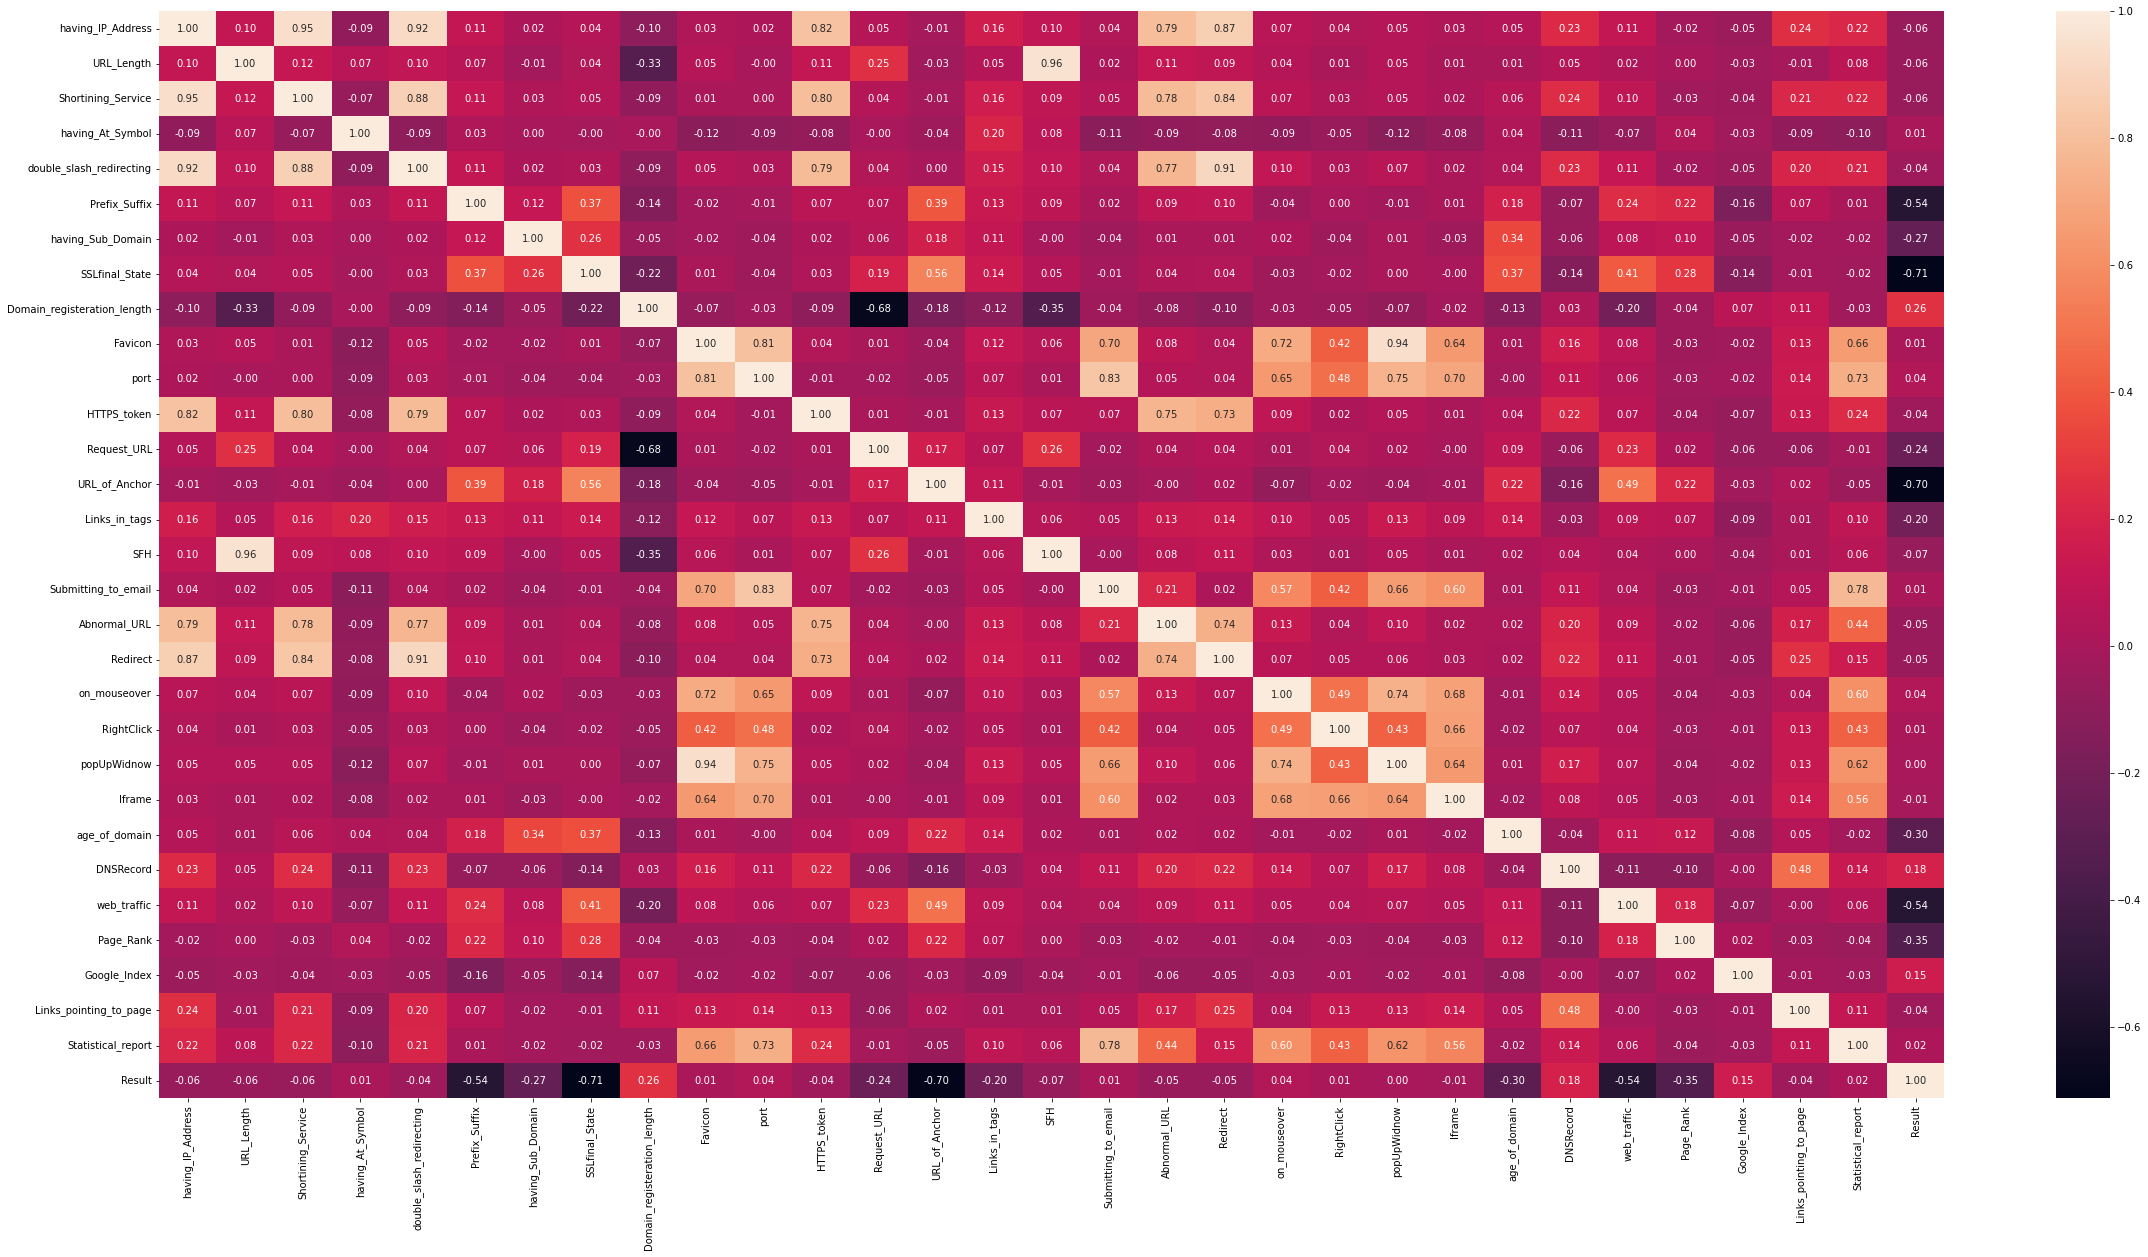

In [5]:
fig, ax = plt.subplots(figsize=(40,20))         

sns.heatmap(df.corr(method ='pearson'), annot=True, fmt='.2f')


This correlation matrix is presented in order to see which features have a strong correlation with each other as well as with the result. Since we have 30 features, sometimes it is essential to consider only those features that are the most important using this correlation matrix. But, the above heatmap did not help in choosing the most important features, hence I am going to use all the features for the classification.

CLASS DISTRIBUTION

In [6]:
from collections import Counter

classes = Counter(df['Result'].values)
classes.most_common()

[(0.0, 1362), (1.0, 1094)]

Here, class refers to the 'Result' column. I'm trying to understand how many of them are classified as 'Phishing website' and how many are not. This is important to know because if there is severe imbalance between the classes, then it requires complex models to detect/classify the Phishing websites

In [7]:
class_dist = pd.DataFrame(classes.most_common(), columns=['Class', 'Count'])
class_dist

,Class,Count
0,0.0,1362
1,1.0,1094


0 refers to not Phishing, 1 refers to Phishing

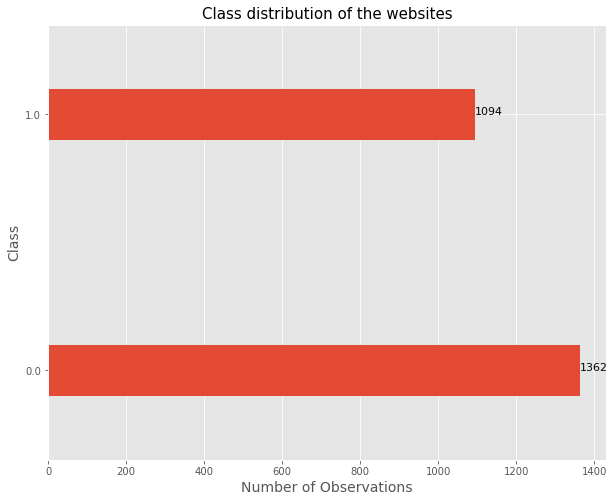

In [8]:
#Plotting the distribution
%matplotlib inline
plt.style.use('ggplot')

subplot = class_dist.groupby('Class')['Count'].sum().plot(kind='barh', width=0.2, figsize=(10,8))

subplot.set_title('Class distribution of the websites', fontsize = 15)
subplot.set_xlabel('Number of Observations', fontsize = 14)
subplot.set_ylabel('Class', fontsize = 14)

for i in subplot.patches:
    subplot.text(i.get_width()+0.1, i.get_y()+0.1, \
            str(i.get_width()), fontsize=11)

The classes not evenly distributed, but the distribution is not severely imbalanced. So we are good to go for further EDA and Predictions

UNIVARIATE ANALYSIS- This is done to understand the distribution among different values in each feature. 

In [9]:
columns=list(df.columns)

IndexError: index 10 is out of bounds for axis 0 with size 10

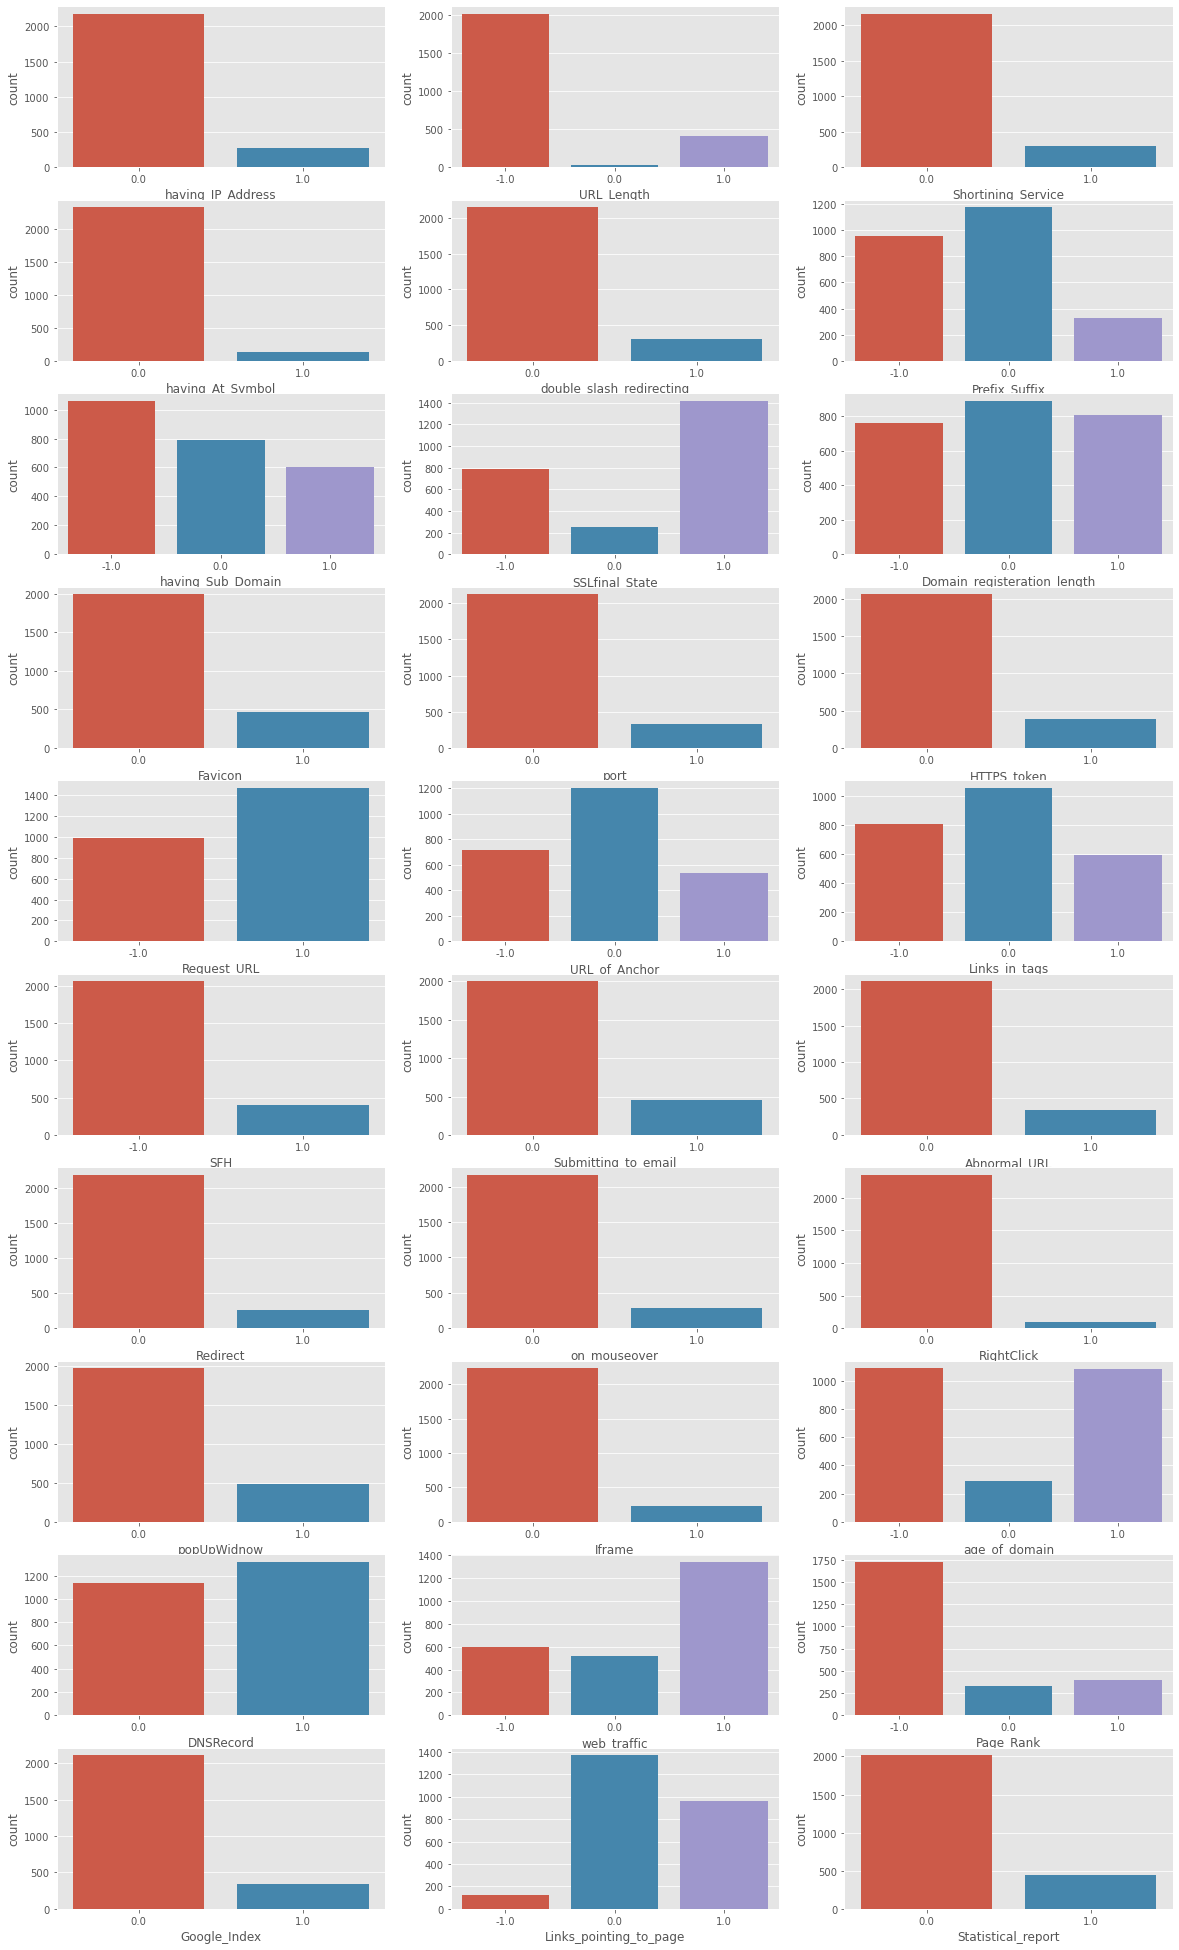

In [10]:
fig,axes = plt.subplots(10,3,figsize=(20,35))
for idx,cat_col in enumerate(columns):
    row,col = idx//3,idx%3
    sns.countplot(x=cat_col,data=df,ax=axes[row,col])


plt.subplots_adjust(hspace=25)

By looking at each of the above plot, it will be clear to us, the distribution of the feature types, for each feature. While the target variable's distribution is not very imbalanced, we can see that in some features, the distribution is very imbalanced. Hence, it does not look like considering few features among the 30, would not help. Every feature and it's combination with one another might lead to precise detection of Phishing websites.

TRAIN-TEST SPLIT 

In [11]:
#Splitting into 80% training data and 20% test data
X = df.iloc[:,0:29].values.astype(int)
y = df.iloc[:,29].values.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.seed(7))

Logistic Regression is a simple, yet powerful method particularly in Binary Classification problems. Hence I am using this first and then I am going to use other methods based on the Logistic Regression results

In [12]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [13]:
from sklearn.metrics import accuracy_score, classification_report

print('Accuracy score of the Logistic Regression classifier with default hyperparameter values {0:.2f}%'.format(accuracy_score(y_test, lr.predict(X_test))*100.))
print('\n')
print('Classification report of the Logistic Regression classifier with default hyperparameter value')
print('\n')
print(classification_report(y_test, lr.predict(X_test), target_names=['Phishing Websites', 'Normal Websites']))

Accuracy score of the Logistic Regression classifier with default hyperparameter values 97.15%


Classification report of the Logistic Regression classifier with default hyperparameter value


                   precision    recall  f1-score   support

Phishing Websites       0.99      0.98      0.98       404
  Normal Websites       0.91      0.93      0.92        88

         accuracy                           0.97       492
        macro avg       0.95      0.96      0.95       492
     weighted avg       0.97      0.97      0.97       492



Text(91.68, 0.5, 'predicted label')

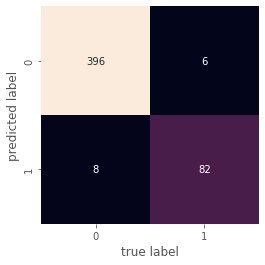

In [14]:
mat_lr = confusion_matrix(y_test,lr.predict(X_test) )

sns.heatmap(mat_lr.T, square=True, annot=True, fmt='d', cbar=False)

plt.xlabel('true label')

plt.ylabel('predicted label')

In [15]:
def plot_roc(model, X_test, y_test):
    # calculate the fpr and tpr for all thresholds of the classification
    probabilities = model.predict_proba(np.array(X_test))
    predictions = probabilities[:, 1]
    fpr, tpr, threshold = metrics.roc_curve(y_test,predictions)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

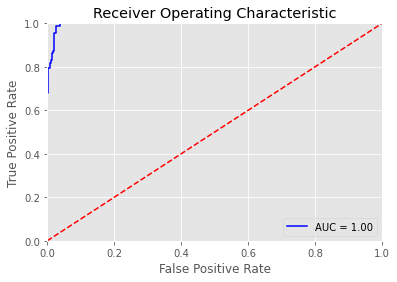

In [16]:
plot_roc(lr,X_test,y_test)

97% is a good Accuracy Score, Maximum number of Predicted values fall in True Positive and True Negative Brackets whereas 6 of them are False positives and 8 of them are False Negatives. Let us do a randomised search to optimise and
see if we can improve the performance to any extent.

In [17]:
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l1', 'l2']
C = [0.8, 0.9, 1.0]
tol = [0.01, 0.001 ,0.0001]
max_iter = [100, 150, 200, 250]

param_grid = dict(penalty=penalty, C=C, tol=tol, max_iter=max_iter)

In [18]:
# Instantiate RandomizedSearchCV with the required parameters
random_model = RandomizedSearchCV(estimator=lr, param_distributions=param_grid, cv=5)

# Fit random_model to the data
random_model_result = random_model.fit(X_train, y_train)

# Summarize results
best_score, best_params = random_model_result.best_score_, random_model_result.best_params_
print("Best score: %.2f using %s" % (best_score*100., best_params))

Best score: 96.59 using {'tol': 0.0001, 'penalty': 'l2', 'max_iter': 200, 'C': 0.8}


/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mniharika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_log

Randomised Search did not work as expected. It gave a 96% accuracy but Logistic regression itself gave a 97% accuracy.
Let us see if Decision tree works any better. Decision trees are best suited for multiclass classification problems but no harm in trying it out on binary classification!

In [19]:
#Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
print('Accuracy score of the Decision Tree classifier {0:.2f}%'.format(accuracy_score(y_test, model.predict(X_test))*100.))
print('\n')
print('Classification report of the Decision Tree classifier')
print('\n')
print(classification_report(y_test, model.predict(X_test), target_names=['Phishing Websites', 'Normal Websites']))

Accuracy score of the Decision Tree classifier 99.80%


Classification report of the Decision Tree classifier


                   precision    recall  f1-score   support

Phishing Websites       1.00      1.00      1.00       404
  Normal Websites       0.99      1.00      0.99        88

         accuracy                           1.00       492
        macro avg       0.99      1.00      1.00       492
     weighted avg       1.00      1.00      1.00       492



Text(91.68, 0.5, 'predicted label')

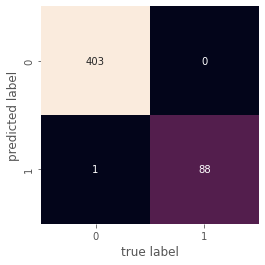

In [21]:
mat = confusion_matrix(y_test,model.predict(X_test))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

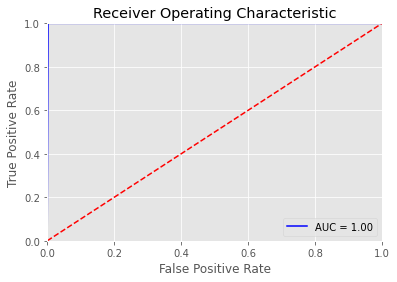

In [22]:
plot_roc(model,X_test,y_test)

99.8% accuracy is pretty good. The Number of False Negatives is only 1 and 0 False Positives! This is by far the best performing model. But let us once see if Neural Networks can do any magic here!

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import *

2023-05-21 00:22:24.645248: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
model_nn = Sequential()

model_nn.add(Dense(40, activation='relu',
          kernel_initializer='uniform',input_dim=X.shape[1]))
model_nn.add(Dense(30, activation='relu',
          kernel_initializer='uniform'))
model_nn.add(Dense(1,  activation='sigmoid', 
          kernel_initializer='uniform'))

model_nn.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model_nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                1200      
                                                                 
 dense_1 (Dense)             (None, 30)                1230      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 2,461
Trainable params: 2,461
Non-trainable params: 0
_________________________________________________________________


2023-05-21 00:22:35.878458: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
from keras import callbacks

es_cb = callbacks.EarlyStopping(monitor='loss', min_delta=0.001, patience=5)

In [26]:
history = model_nn.fit(X_train, y_train, batch_size=64, epochs=128, verbose=1, callbacks=[es_cb])

scores = model_nn.evaluate(X_test, y_test)
print('\nAccuracy score of the Neural Network with basic hyperparameter settings {0:.2f}%'.format(scores[1]*100))

Epoch 1/128
31/31 [==============================] - 1s 2ms/step - loss: 0.6753 - accuracy: 0.8111
Epoch 2/128
31/31 [==============================] - 0s 2ms/step - loss: 0.5262 - accuracy: 0.8208
Epoch 3/128
31/31 [==============================] - 0s 3ms/step - loss: 0.3309 - accuracy: 0.8208
Epoch 4/128
31/31 [==============================] - 0s 3ms/step - loss: 0.2556 - accuracy: 0.8788
Epoch 5/128
31/31 [==============================] - 0s 3ms/step - loss: 0.2131 - accuracy: 0.9313
Epoch 6/128
31/31 [==============================] - 0s 3ms/step - loss: 0.1753 - accuracy: 0.9414
Epoch 7/128
31/31 [==============================] - 0s 2ms/step - loss: 0.1437 - accuracy: 0.9516
Epoch 8/128
31/31 [==============================] - 0s 3ms/step - loss: 0.1231 - accuracy: 0.9577
Epoch 9/128
31/31 [==============================] - 0s 3ms/step - loss: 0.1099 - accuracy: 0.9603
Epoch 10/128
31/31 [==============================] - 0s 3ms/step - loss: 0.1008 - accuracy: 0.9633
Epoch 11/

Accuracy is at 98%. Well, this is the 2nd best performing model with Decision Tree taking the 1st place!

In [48]:
#Storing accuracy results 
lr_result=(accuracy_score(y_test, lr.predict(X_test))*100).round(3)
dt_result=(accuracy_score(y_test, model.predict(X_test))*100).round(3)
random_result=(best_score*100).round(3)
nn_result=(scores[1]*100)

In [49]:
#Printing all results in a dataframe 
models={'Model_name':['Logistic Regression','Randomised Search','Decision Tree','Neural Network']}
results=pd.DataFrame(models)
results['Accuracy(%)']=[lr_result,random_result,dt_result,nn_result]

In [50]:
results

,Model_name,Accuracy(%)
0,Logistic Regression,97.154000
1,Randomised Search,96.589000
2,Decision Tree,99.797000
3,Neural Network,98.170733


------------------------------------------------END-------------------------------------------------------------------